# Social Network Segmentation Analysis

In this exercise, we will try to identify different groups of teenagers based on their personal preferences using an unsupervised learning model.  
  
Start by importing your libraries, loading the dataset and exploring its variables.  
What features do you find? Do they have the correct datatypes?

In [1]:
#Import your libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
#Load the dataset and explore its variables
data=pd.read_csv('snsdata.csv')

In [3]:
display(data.head())
display(data.columns)
display(data.info())

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


Index(['gradyear', 'gender', 'age', 'friends', 'basketball', 'football',
       'soccer', 'softball', 'volleyball', 'swimming', 'cheerleading',
       'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed',
       'dance', 'band', 'marching', 'music', 'rock', 'god', 'church', 'jesus',
       'bible', 'hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes',
       'hollister', 'abercrombie', 'die', 'death', 'drunk', 'drugs'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gradyear      30000 non-null  int64  
 1   gender        27276 non-null  object 
 2   age           24914 non-null  float64
 3   friends       30000 non-null  int64  
 4   basketball    30000 non-null  int64  
 5   football      30000 non-null  int64  
 6   soccer        30000 non-null  int64  
 7   softball      30000 non-null  int64  
 8   volleyball    30000 non-null  int64  
 9   swimming      30000 non-null  int64  
 10  cheerleading  30000 non-null  int64  
 11  baseball      30000 non-null  int64  
 12  tennis        30000 non-null  int64  
 13  sports        30000 non-null  int64  
 14  cute          30000 non-null  int64  
 15  sex           30000 non-null  int64  
 16  sexy          30000 non-null  int64  
 17  hot           30000 non-null  int64  
 18  kissed        30000 non-nu

None

In [4]:
# There are 40 features
# age have wrong type
# gender could be converted from boolean to int

## 1. Data Wrangling

If you found in the last step that there are variables that need to be dealt with before we can start our analysis, please do it. Comment your code and take us through the steps of your thinking.  

Consider the some of these aspects:  
* Wrong data types
* Null values
* Consistency in categorical data

In [5]:
#Your code here:
data=data.dropna()
#data['age']=[int(i) for i in data['age']]
#data['gender']=[0 if i=='F' else 1 for i in data['gender']]

In [6]:
data.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2006,F,18.930,72,0,0,0,0,0,0,...,0,2,0,0,2,0,0,0,0,0


In [7]:
len(data)

24005

## 2. Data Visualization

Now that the data is more or less fixed, plot some charts to understand better how it is composed:  
* Check distribution of variables - do we have outliers? What should we do with them?
* Understand which features are correlated - do they represent the same? Which ones should we keep?
* When we compare two variables, is it possible to see groups in the data?
* Given the dimension of the dataset, would it be useful to perform dimension reduction in some variables? Which ones would you group?

Comment your ideas based on the visualizations you made and other data exploration. What will be your next steps before modeling?

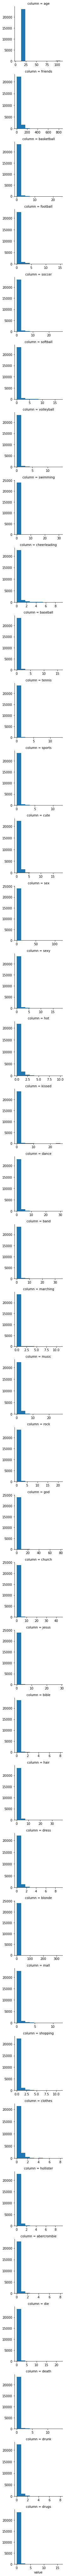

In [8]:
#Your code here:
data_melted = data[data.columns[2:]].melt(var_name='column')
g = sns.FacetGrid(data_melted, row='column',sharex=False,sharey=False)
g.map(plt.hist,'value')

In [17]:
for i in data.columns[2:]:
    display(data.corr()[i]>0.8)

age              False
friends          False
basketball        True
football         False
soccer           False
softball         False
volleyball       False
swimming         False
cheerleading     False
baseball         False
tennis           False
sports           False
cute             False
sex              False
sexy             False
hot              False
kissed           False
dance            False
band             False
marching         False
music            False
rock             False
god              False
church           False
jesus            False
bible            False
hair             False
dress            False
blonde           False
mall             False
shopping         False
clothes          False
hollister        False
abercrombie      False
die              False
death            False
drunk            False
drugs            False
gender_M         False
gradyear_2007    False
gradyear_2008    False
gradyear_2009    False
labels           False
Name: baske

age              False
friends          False
basketball       False
football          True
soccer           False
softball         False
volleyball       False
swimming         False
cheerleading     False
baseball         False
tennis           False
sports           False
cute             False
sex              False
sexy             False
hot              False
kissed           False
dance            False
band             False
marching         False
music            False
rock             False
god              False
church           False
jesus            False
bible            False
hair             False
dress            False
blonde           False
mall             False
shopping         False
clothes          False
hollister        False
abercrombie      False
die              False
death            False
drunk            False
drugs            False
gender_M         False
gradyear_2007    False
gradyear_2008    False
gradyear_2009    False
labels           False
Name: footb

age              False
friends          False
basketball       False
football         False
soccer            True
softball         False
volleyball       False
swimming         False
cheerleading     False
baseball         False
tennis           False
sports           False
cute             False
sex              False
sexy             False
hot              False
kissed           False
dance            False
band             False
marching         False
music            False
rock             False
god              False
church           False
jesus            False
bible            False
hair             False
dress            False
blonde           False
mall             False
shopping         False
clothes          False
hollister        False
abercrombie      False
die              False
death            False
drunk            False
drugs            False
gender_M         False
gradyear_2007    False
gradyear_2008    False
gradyear_2009    False
labels           False
Name: socce

age              False
friends          False
basketball       False
football         False
soccer           False
softball          True
volleyball       False
swimming         False
cheerleading     False
baseball         False
tennis           False
sports           False
cute             False
sex              False
sexy             False
hot              False
kissed           False
dance            False
band             False
marching         False
music            False
rock             False
god              False
church           False
jesus            False
bible            False
hair             False
dress            False
blonde           False
mall             False
shopping         False
clothes          False
hollister        False
abercrombie      False
die              False
death            False
drunk            False
drugs            False
gender_M         False
gradyear_2007    False
gradyear_2008    False
gradyear_2009    False
labels           False
Name: softb

age              False
friends          False
basketball       False
football         False
soccer           False
softball         False
volleyball        True
swimming         False
cheerleading     False
baseball         False
tennis           False
sports           False
cute             False
sex              False
sexy             False
hot              False
kissed           False
dance            False
band             False
marching         False
music            False
rock             False
god              False
church           False
jesus            False
bible            False
hair             False
dress            False
blonde           False
mall             False
shopping         False
clothes          False
hollister        False
abercrombie      False
die              False
death            False
drunk            False
drugs            False
gender_M         False
gradyear_2007    False
gradyear_2008    False
gradyear_2009    False
labels           False
Name: volle

age              False
friends          False
basketball       False
football         False
soccer           False
softball         False
volleyball       False
swimming          True
cheerleading     False
baseball         False
tennis           False
sports           False
cute             False
sex              False
sexy             False
hot              False
kissed           False
dance            False
band             False
marching         False
music            False
rock             False
god              False
church           False
jesus            False
bible            False
hair             False
dress            False
blonde           False
mall             False
shopping         False
clothes          False
hollister        False
abercrombie      False
die              False
death            False
drunk            False
drugs            False
gender_M         False
gradyear_2007    False
gradyear_2008    False
gradyear_2009    False
labels           False
Name: swimm

age              False
friends          False
basketball       False
football         False
soccer           False
softball         False
volleyball       False
swimming         False
cheerleading      True
baseball         False
tennis           False
sports           False
cute             False
sex              False
sexy             False
hot              False
kissed           False
dance            False
band             False
marching         False
music            False
rock             False
god              False
church           False
jesus            False
bible            False
hair             False
dress            False
blonde           False
mall             False
shopping         False
clothes          False
hollister        False
abercrombie      False
die              False
death            False
drunk            False
drugs            False
gender_M         False
gradyear_2007    False
gradyear_2008    False
gradyear_2009    False
labels           False
Name: cheer

age              False
friends          False
basketball       False
football         False
soccer           False
softball         False
volleyball       False
swimming         False
cheerleading     False
baseball          True
tennis           False
sports           False
cute             False
sex              False
sexy             False
hot              False
kissed           False
dance            False
band             False
marching         False
music            False
rock             False
god              False
church           False
jesus            False
bible            False
hair             False
dress            False
blonde           False
mall             False
shopping         False
clothes          False
hollister        False
abercrombie      False
die              False
death            False
drunk            False
drugs            False
gender_M         False
gradyear_2007    False
gradyear_2008    False
gradyear_2009    False
labels           False
Name: baseb

age              False
friends          False
basketball       False
football         False
soccer           False
softball         False
volleyball       False
swimming         False
cheerleading     False
baseball         False
tennis            True
sports           False
cute             False
sex              False
sexy             False
hot              False
kissed           False
dance            False
band             False
marching         False
music            False
rock             False
god              False
church           False
jesus            False
bible            False
hair             False
dress            False
blonde           False
mall             False
shopping         False
clothes          False
hollister        False
abercrombie      False
die              False
death            False
drunk            False
drugs            False
gender_M         False
gradyear_2007    False
gradyear_2008    False
gradyear_2009    False
labels           False
Name: tenni

age              False
friends          False
basketball       False
football         False
soccer           False
softball         False
volleyball       False
swimming         False
cheerleading     False
baseball         False
tennis           False
sports            True
cute             False
sex              False
sexy             False
hot              False
kissed           False
dance            False
band             False
marching         False
music            False
rock             False
god              False
church           False
jesus            False
bible            False
hair             False
dress            False
blonde           False
mall             False
shopping         False
clothes          False
hollister        False
abercrombie      False
die              False
death            False
drunk            False
drugs            False
gender_M         False
gradyear_2007    False
gradyear_2008    False
gradyear_2009    False
labels           False
Name: sport

age              False
friends          False
basketball       False
football         False
soccer           False
softball         False
volleyball       False
swimming         False
cheerleading     False
baseball         False
tennis           False
sports           False
cute              True
sex              False
sexy             False
hot              False
kissed           False
dance            False
band             False
marching         False
music            False
rock             False
god              False
church           False
jesus            False
bible            False
hair             False
dress            False
blonde           False
mall             False
shopping         False
clothes          False
hollister        False
abercrombie      False
die              False
death            False
drunk            False
drugs            False
gender_M         False
gradyear_2007    False
gradyear_2008    False
gradyear_2009    False
labels           False
Name: cute,

age              False
friends          False
basketball       False
football         False
soccer           False
softball         False
volleyball       False
swimming         False
cheerleading     False
baseball         False
tennis           False
sports           False
cute             False
sex               True
sexy             False
hot              False
kissed           False
dance            False
band             False
marching         False
music            False
rock             False
god              False
church           False
jesus            False
bible            False
hair             False
dress            False
blonde           False
mall             False
shopping         False
clothes          False
hollister        False
abercrombie      False
die              False
death            False
drunk            False
drugs            False
gender_M         False
gradyear_2007    False
gradyear_2008    False
gradyear_2009    False
labels           False
Name: sex, 

age              False
friends          False
basketball       False
football         False
soccer           False
softball         False
volleyball       False
swimming         False
cheerleading     False
baseball         False
tennis           False
sports           False
cute             False
sex              False
sexy              True
hot              False
kissed           False
dance            False
band             False
marching         False
music            False
rock             False
god              False
church           False
jesus            False
bible            False
hair             False
dress            False
blonde           False
mall             False
shopping         False
clothes          False
hollister        False
abercrombie      False
die              False
death            False
drunk            False
drugs            False
gender_M         False
gradyear_2007    False
gradyear_2008    False
gradyear_2009    False
labels           False
Name: sexy,

age              False
friends          False
basketball       False
football         False
soccer           False
softball         False
volleyball       False
swimming         False
cheerleading     False
baseball         False
tennis           False
sports           False
cute             False
sex              False
sexy             False
hot               True
kissed           False
dance            False
band             False
marching         False
music            False
rock             False
god              False
church           False
jesus            False
bible            False
hair             False
dress            False
blonde           False
mall             False
shopping         False
clothes          False
hollister        False
abercrombie      False
die              False
death            False
drunk            False
drugs            False
gender_M         False
gradyear_2007    False
gradyear_2008    False
gradyear_2009    False
labels           False
Name: hot, 

age              False
friends          False
basketball       False
football         False
soccer           False
softball         False
volleyball       False
swimming         False
cheerleading     False
baseball         False
tennis           False
sports           False
cute             False
sex              False
sexy             False
hot              False
kissed            True
dance            False
band             False
marching         False
music            False
rock             False
god              False
church           False
jesus            False
bible            False
hair             False
dress            False
blonde           False
mall             False
shopping         False
clothes          False
hollister        False
abercrombie      False
die              False
death            False
drunk            False
drugs            False
gender_M         False
gradyear_2007    False
gradyear_2008    False
gradyear_2009    False
labels           False
Name: kisse

age              False
friends          False
basketball       False
football         False
soccer           False
softball         False
volleyball       False
swimming         False
cheerleading     False
baseball         False
tennis           False
sports           False
cute             False
sex              False
sexy             False
hot              False
kissed           False
dance             True
band             False
marching         False
music            False
rock             False
god              False
church           False
jesus            False
bible            False
hair             False
dress            False
blonde           False
mall             False
shopping         False
clothes          False
hollister        False
abercrombie      False
die              False
death            False
drunk            False
drugs            False
gender_M         False
gradyear_2007    False
gradyear_2008    False
gradyear_2009    False
labels           False
Name: dance

age              False
friends          False
basketball       False
football         False
soccer           False
softball         False
volleyball       False
swimming         False
cheerleading     False
baseball         False
tennis           False
sports           False
cute             False
sex              False
sexy             False
hot              False
kissed           False
dance            False
band              True
marching         False
music            False
rock             False
god              False
church           False
jesus            False
bible            False
hair             False
dress            False
blonde           False
mall             False
shopping         False
clothes          False
hollister        False
abercrombie      False
die              False
death            False
drunk            False
drugs            False
gender_M         False
gradyear_2007    False
gradyear_2008    False
gradyear_2009    False
labels           False
Name: band,

age              False
friends          False
basketball       False
football         False
soccer           False
softball         False
volleyball       False
swimming         False
cheerleading     False
baseball         False
tennis           False
sports           False
cute             False
sex              False
sexy             False
hot              False
kissed           False
dance            False
band             False
marching          True
music            False
rock             False
god              False
church           False
jesus            False
bible            False
hair             False
dress            False
blonde           False
mall             False
shopping         False
clothes          False
hollister        False
abercrombie      False
die              False
death            False
drunk            False
drugs            False
gender_M         False
gradyear_2007    False
gradyear_2008    False
gradyear_2009    False
labels           False
Name: march

age              False
friends          False
basketball       False
football         False
soccer           False
softball         False
volleyball       False
swimming         False
cheerleading     False
baseball         False
tennis           False
sports           False
cute             False
sex              False
sexy             False
hot              False
kissed           False
dance            False
band             False
marching         False
music             True
rock             False
god              False
church           False
jesus            False
bible            False
hair             False
dress            False
blonde           False
mall             False
shopping         False
clothes          False
hollister        False
abercrombie      False
die              False
death            False
drunk            False
drugs            False
gender_M         False
gradyear_2007    False
gradyear_2008    False
gradyear_2009    False
labels           False
Name: music

age              False
friends          False
basketball       False
football         False
soccer           False
softball         False
volleyball       False
swimming         False
cheerleading     False
baseball         False
tennis           False
sports           False
cute             False
sex              False
sexy             False
hot              False
kissed           False
dance            False
band             False
marching         False
music            False
rock              True
god              False
church           False
jesus            False
bible            False
hair             False
dress            False
blonde           False
mall             False
shopping         False
clothes          False
hollister        False
abercrombie      False
die              False
death            False
drunk            False
drugs            False
gender_M         False
gradyear_2007    False
gradyear_2008    False
gradyear_2009    False
labels           False
Name: rock,

age              False
friends          False
basketball       False
football         False
soccer           False
softball         False
volleyball       False
swimming         False
cheerleading     False
baseball         False
tennis           False
sports           False
cute             False
sex              False
sexy             False
hot              False
kissed           False
dance            False
band             False
marching         False
music            False
rock             False
god               True
church           False
jesus            False
bible            False
hair             False
dress            False
blonde           False
mall             False
shopping         False
clothes          False
hollister        False
abercrombie      False
die              False
death            False
drunk            False
drugs            False
gender_M         False
gradyear_2007    False
gradyear_2008    False
gradyear_2009    False
labels           False
Name: god, 

age              False
friends          False
basketball       False
football         False
soccer           False
softball         False
volleyball       False
swimming         False
cheerleading     False
baseball         False
tennis           False
sports           False
cute             False
sex              False
sexy             False
hot              False
kissed           False
dance            False
band             False
marching         False
music            False
rock             False
god              False
church            True
jesus            False
bible            False
hair             False
dress            False
blonde           False
mall             False
shopping         False
clothes          False
hollister        False
abercrombie      False
die              False
death            False
drunk            False
drugs            False
gender_M         False
gradyear_2007    False
gradyear_2008    False
gradyear_2009    False
labels           False
Name: churc

age              False
friends          False
basketball       False
football         False
soccer           False
softball         False
volleyball       False
swimming         False
cheerleading     False
baseball         False
tennis           False
sports           False
cute             False
sex              False
sexy             False
hot              False
kissed           False
dance            False
band             False
marching         False
music            False
rock             False
god              False
church           False
jesus             True
bible            False
hair             False
dress            False
blonde           False
mall             False
shopping         False
clothes          False
hollister        False
abercrombie      False
die              False
death            False
drunk            False
drugs            False
gender_M         False
gradyear_2007    False
gradyear_2008    False
gradyear_2009    False
labels           False
Name: jesus

age              False
friends          False
basketball       False
football         False
soccer           False
softball         False
volleyball       False
swimming         False
cheerleading     False
baseball         False
tennis           False
sports           False
cute             False
sex              False
sexy             False
hot              False
kissed           False
dance            False
band             False
marching         False
music            False
rock             False
god              False
church           False
jesus            False
bible             True
hair             False
dress            False
blonde           False
mall             False
shopping         False
clothes          False
hollister        False
abercrombie      False
die              False
death            False
drunk            False
drugs            False
gender_M         False
gradyear_2007    False
gradyear_2008    False
gradyear_2009    False
labels           False
Name: bible

age              False
friends          False
basketball       False
football         False
soccer           False
softball         False
volleyball       False
swimming         False
cheerleading     False
baseball         False
tennis           False
sports           False
cute             False
sex              False
sexy             False
hot              False
kissed           False
dance            False
band             False
marching         False
music            False
rock             False
god              False
church           False
jesus            False
bible            False
hair              True
dress            False
blonde           False
mall             False
shopping         False
clothes          False
hollister        False
abercrombie      False
die              False
death            False
drunk            False
drugs            False
gender_M         False
gradyear_2007    False
gradyear_2008    False
gradyear_2009    False
labels           False
Name: hair,

age              False
friends          False
basketball       False
football         False
soccer           False
softball         False
volleyball       False
swimming         False
cheerleading     False
baseball         False
tennis           False
sports           False
cute             False
sex              False
sexy             False
hot              False
kissed           False
dance            False
band             False
marching         False
music            False
rock             False
god              False
church           False
jesus            False
bible            False
hair             False
dress             True
blonde           False
mall             False
shopping         False
clothes          False
hollister        False
abercrombie      False
die              False
death            False
drunk            False
drugs            False
gender_M         False
gradyear_2007    False
gradyear_2008    False
gradyear_2009    False
labels           False
Name: dress

age              False
friends          False
basketball       False
football         False
soccer           False
softball         False
volleyball       False
swimming         False
cheerleading     False
baseball         False
tennis           False
sports           False
cute             False
sex              False
sexy             False
hot              False
kissed           False
dance            False
band             False
marching         False
music            False
rock             False
god              False
church           False
jesus            False
bible            False
hair             False
dress            False
blonde            True
mall             False
shopping         False
clothes          False
hollister        False
abercrombie      False
die              False
death            False
drunk            False
drugs            False
gender_M         False
gradyear_2007    False
gradyear_2008    False
gradyear_2009    False
labels           False
Name: blond

age              False
friends          False
basketball       False
football         False
soccer           False
softball         False
volleyball       False
swimming         False
cheerleading     False
baseball         False
tennis           False
sports           False
cute             False
sex              False
sexy             False
hot              False
kissed           False
dance            False
band             False
marching         False
music            False
rock             False
god              False
church           False
jesus            False
bible            False
hair             False
dress            False
blonde           False
mall              True
shopping         False
clothes          False
hollister        False
abercrombie      False
die              False
death            False
drunk            False
drugs            False
gender_M         False
gradyear_2007    False
gradyear_2008    False
gradyear_2009    False
labels           False
Name: mall,

age              False
friends          False
basketball       False
football         False
soccer           False
softball         False
volleyball       False
swimming         False
cheerleading     False
baseball         False
tennis           False
sports           False
cute             False
sex              False
sexy             False
hot              False
kissed           False
dance            False
band             False
marching         False
music            False
rock             False
god              False
church           False
jesus            False
bible            False
hair             False
dress            False
blonde           False
mall             False
shopping          True
clothes          False
hollister        False
abercrombie      False
die              False
death            False
drunk            False
drugs            False
gender_M         False
gradyear_2007    False
gradyear_2008    False
gradyear_2009    False
labels           False
Name: shopp

age              False
friends          False
basketball       False
football         False
soccer           False
softball         False
volleyball       False
swimming         False
cheerleading     False
baseball         False
tennis           False
sports           False
cute             False
sex              False
sexy             False
hot              False
kissed           False
dance            False
band             False
marching         False
music            False
rock             False
god              False
church           False
jesus            False
bible            False
hair             False
dress            False
blonde           False
mall             False
shopping         False
clothes           True
hollister        False
abercrombie      False
die              False
death            False
drunk            False
drugs            False
gender_M         False
gradyear_2007    False
gradyear_2008    False
gradyear_2009    False
labels           False
Name: cloth

age              False
friends          False
basketball       False
football         False
soccer           False
softball         False
volleyball       False
swimming         False
cheerleading     False
baseball         False
tennis           False
sports           False
cute             False
sex              False
sexy             False
hot              False
kissed           False
dance            False
band             False
marching         False
music            False
rock             False
god              False
church           False
jesus            False
bible            False
hair             False
dress            False
blonde           False
mall             False
shopping         False
clothes          False
hollister         True
abercrombie      False
die              False
death            False
drunk            False
drugs            False
gender_M         False
gradyear_2007    False
gradyear_2008    False
gradyear_2009    False
labels           False
Name: holli

age              False
friends          False
basketball       False
football         False
soccer           False
softball         False
volleyball       False
swimming         False
cheerleading     False
baseball         False
tennis           False
sports           False
cute             False
sex              False
sexy             False
hot              False
kissed           False
dance            False
band             False
marching         False
music            False
rock             False
god              False
church           False
jesus            False
bible            False
hair             False
dress            False
blonde           False
mall             False
shopping         False
clothes          False
hollister        False
abercrombie       True
die              False
death            False
drunk            False
drugs            False
gender_M         False
gradyear_2007    False
gradyear_2008    False
gradyear_2009    False
labels           False
Name: aberc

age              False
friends          False
basketball       False
football         False
soccer           False
softball         False
volleyball       False
swimming         False
cheerleading     False
baseball         False
tennis           False
sports           False
cute             False
sex              False
sexy             False
hot              False
kissed           False
dance            False
band             False
marching         False
music            False
rock             False
god              False
church           False
jesus            False
bible            False
hair             False
dress            False
blonde           False
mall             False
shopping         False
clothes          False
hollister        False
abercrombie      False
die               True
death            False
drunk            False
drugs            False
gender_M         False
gradyear_2007    False
gradyear_2008    False
gradyear_2009    False
labels           False
Name: die, 

age              False
friends          False
basketball       False
football         False
soccer           False
softball         False
volleyball       False
swimming         False
cheerleading     False
baseball         False
tennis           False
sports           False
cute             False
sex              False
sexy             False
hot              False
kissed           False
dance            False
band             False
marching         False
music            False
rock             False
god              False
church           False
jesus            False
bible            False
hair             False
dress            False
blonde           False
mall             False
shopping         False
clothes          False
hollister        False
abercrombie      False
die              False
death             True
drunk            False
drugs            False
gender_M         False
gradyear_2007    False
gradyear_2008    False
gradyear_2009    False
labels           False
Name: death

age              False
friends          False
basketball       False
football         False
soccer           False
softball         False
volleyball       False
swimming         False
cheerleading     False
baseball         False
tennis           False
sports           False
cute             False
sex              False
sexy             False
hot              False
kissed           False
dance            False
band             False
marching         False
music            False
rock             False
god              False
church           False
jesus            False
bible            False
hair             False
dress            False
blonde           False
mall             False
shopping         False
clothes          False
hollister        False
abercrombie      False
die              False
death            False
drunk             True
drugs            False
gender_M         False
gradyear_2007    False
gradyear_2008    False
gradyear_2009    False
labels           False
Name: drunk

age              False
friends          False
basketball       False
football         False
soccer           False
softball         False
volleyball       False
swimming         False
cheerleading     False
baseball         False
tennis           False
sports           False
cute             False
sex              False
sexy             False
hot              False
kissed           False
dance            False
band             False
marching         False
music            False
rock             False
god              False
church           False
jesus            False
bible            False
hair             False
dress            False
blonde           False
mall             False
shopping         False
clothes          False
hollister        False
abercrombie      False
die              False
death            False
drunk            False
drugs             True
gender_M         False
gradyear_2007    False
gradyear_2008    False
gradyear_2009    False
labels           False
Name: drugs

age              False
friends          False
basketball       False
football         False
soccer           False
softball         False
volleyball       False
swimming         False
cheerleading     False
baseball         False
tennis           False
sports           False
cute             False
sex              False
sexy             False
hot              False
kissed           False
dance            False
band             False
marching         False
music            False
rock             False
god              False
church           False
jesus            False
bible            False
hair             False
dress            False
blonde           False
mall             False
shopping         False
clothes          False
hollister        False
abercrombie      False
die              False
death            False
drunk            False
drugs            False
gender_M          True
gradyear_2007    False
gradyear_2008    False
gradyear_2009    False
labels           False
Name: gende

age              False
friends          False
basketball       False
football         False
soccer           False
softball         False
volleyball       False
swimming         False
cheerleading     False
baseball         False
tennis           False
sports           False
cute             False
sex              False
sexy             False
hot              False
kissed           False
dance            False
band             False
marching         False
music            False
rock             False
god              False
church           False
jesus            False
bible            False
hair             False
dress            False
blonde           False
mall             False
shopping         False
clothes          False
hollister        False
abercrombie      False
die              False
death            False
drunk            False
drugs            False
gender_M         False
gradyear_2007     True
gradyear_2008    False
gradyear_2009    False
labels           False
Name: grady

age              False
friends          False
basketball       False
football         False
soccer           False
softball         False
volleyball       False
swimming         False
cheerleading     False
baseball         False
tennis           False
sports           False
cute             False
sex              False
sexy             False
hot              False
kissed           False
dance            False
band             False
marching         False
music            False
rock             False
god              False
church           False
jesus            False
bible            False
hair             False
dress            False
blonde           False
mall             False
shopping         False
clothes          False
hollister        False
abercrombie      False
die              False
death            False
drunk            False
drugs            False
gender_M         False
gradyear_2007    False
gradyear_2008     True
gradyear_2009    False
labels           False
Name: grady

age              False
friends          False
basketball       False
football         False
soccer           False
softball         False
volleyball       False
swimming         False
cheerleading     False
baseball         False
tennis           False
sports           False
cute             False
sex              False
sexy             False
hot              False
kissed           False
dance            False
band             False
marching         False
music            False
rock             False
god              False
church           False
jesus            False
bible            False
hair             False
dress            False
blonde           False
mall             False
shopping         False
clothes          False
hollister        False
abercrombie      False
die              False
death            False
drunk            False
drugs            False
gender_M         False
gradyear_2007    False
gradyear_2008    False
gradyear_2009     True
labels           False
Name: grady

age              False
friends          False
basketball       False
football         False
soccer           False
softball         False
volleyball       False
swimming         False
cheerleading     False
baseball         False
tennis           False
sports           False
cute             False
sex              False
sexy             False
hot              False
kissed           False
dance            False
band             False
marching         False
music            False
rock             False
god              False
church           False
jesus            False
bible            False
hair             False
dress            False
blonde           False
mall             False
shopping         False
clothes          False
hollister        False
abercrombie      False
die              False
death            False
drunk            False
drugs            False
gender_M         False
gradyear_2007    False
gradyear_2008    False
gradyear_2009    False
labels            True
Name: label

## 3. Feature Engineering

Based on your previous conclusions, perform transformations in your features. Think about:  
* Category Encoding
* Outliers & Standardization
* Dimension Reduction
* Discard features that are less relevant to group the data

Why did you choose each method? Please explain your rationale.

In [10]:
#Your code here:
data = pd.get_dummies(data, columns=['gender'], drop_first=True)
data = pd.get_dummies(data, columns=['gradyear'], drop_first=True)
scaler = StandardScaler()
data_transf = pd.DataFrame(scaler.fit_transform(data.iloc[:, :-4]), columns=data.iloc[:, :-4].columns)
data_final = pd.concat([data_transf, data.iloc[:, -4:].reset_index().drop(columns=['index'])], axis=1)
data_final.head()

,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,...,hollister,abercrombie,die,death,drunk,drugs,gender_M,gradyear_2007,gradyear_2008,gradyear_2009
0,0.135155,-0.653353,-0.339576,-0.369368,-0.245502,-0.224588,-0.222704,-0.26098,-0.208847,-0.205135,...,-0.200544,-0.185603,-0.302118,-0.270171,-0.224256,-0.177047,1,0,0,0
1,0.111418,-0.845831,-0.339576,1.018001,-0.245502,-0.224588,-0.222704,-0.26098,-0.208847,-0.205135,...,-0.200544,-0.185603,-0.302118,-0.270171,-0.224256,-0.177047,0,0,0,0
2,0.050305,1.051455,-0.339576,1.018001,-0.245502,-0.224588,-0.222704,-0.26098,-0.208847,-0.205135,...,-0.200544,-0.185603,-0.302118,2.002235,-0.224256,-0.177047,1,0,0,0
3,0.121122,-0.845831,-0.339576,-0.369368,-0.245502,-0.224588,-0.222704,-0.26098,-0.208847,-0.205135,...,-0.200544,-0.185603,-0.302118,-0.270171,-0.224256,-0.177047,0,0,0,0
4,0.128335,1.133945,-0.339576,-0.369368,-0.245502,-0.224588,-0.222704,-0.26098,-0.208847,-0.205135,...,5.493190,-0.185603,-0.302118,-0.270171,-0.224256,-0.177047,0,0,0,0


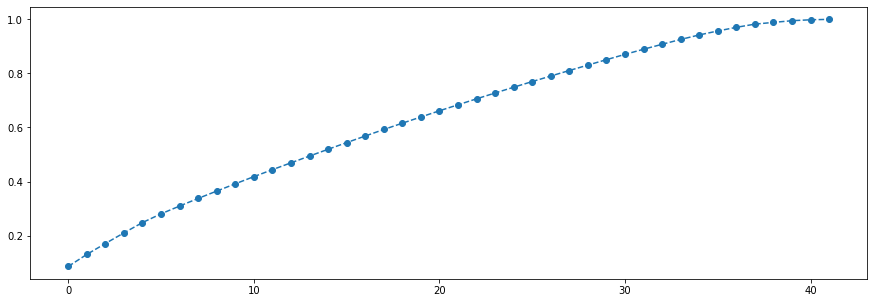

In [11]:
pca = PCA().fit(data_final)
plt.figure(figsize=(15, 5))
plt.plot(pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')

In [12]:
pca = PCA(n_components=27)
principalComponents = pca.fit_transform(data_final)
principaldata = pd.DataFrame(data = principalComponents)
principaldata.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,-1.554095,0.165274,-0.532720,-0.261251,-0.013205,0.115666,0.095385,-0.185635,0.160764,-0.084353,...,0.232238,0.225747,0.148868,0.302529,-0.085359,-0.060034,-0.212994,0.093677,0.272746,0.002163
1,3.347893,0.111736,-1.019054,0.035491,-0.725440,-2.746409,0.308911,-1.894033,0.269386,-0.033721,...,1.374906,-1.203270,-3.481004,-4.418125,0.949425,2.197942,0.109423,-0.347745,0.029108,0.051306
2,-0.601553,0.922573,-0.031952,0.757530,-0.201317,0.298068,0.221552,1.064646,-0.376493,0.364442,...,0.118624,0.007202,-0.002953,0.138714,-0.500780,0.440480,0.218723,0.492389,-1.019837,0.531558
3,-1.144218,0.166756,-0.603086,-0.195832,-0.004389,-0.191561,0.500464,-0.243156,-0.187419,-0.279343,...,-0.487411,-0.194083,0.228491,-0.372859,-0.196169,-0.104248,-0.885409,0.220314,0.036516,-0.040963
4,0.239436,-1.332949,-0.099568,2.018345,-2.861190,2.629811,0.472610,1.221978,0.687586,-0.360700,...,0.190146,0.540244,0.163706,-0.797433,0.388103,-0.111038,-0.000565,0.745520,0.645862,0.830975


In [13]:
# I creatd dummies for gender and gradeyear
# I chose the Standard Scaler to standarize all values and a pca to reduce the dimentions

## 4. Modeling

Now that your data is ready, apply one (or more) unsupervised learning model to find the groups of teens that exist:
* What model did you choose?
* What is the optimal number of clusters?
* Once your clusters are defined, how do you interpret them? - What type of teens there are? What are the differences between them?

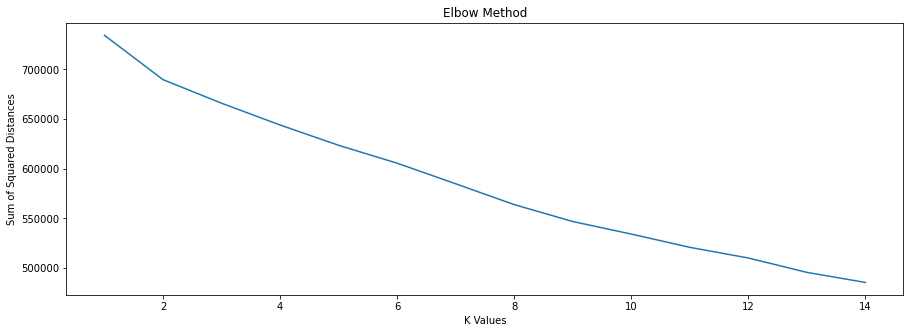

In [14]:
#Your code here:
K = range(1, 15)
sum_squared_distances = []
for k in K:
    model = KMeans(n_clusters=k).fit(principaldata)
    sum_squared_distances.append(model.inertia_)
plt.figure(figsize=(15, 5))
plt.plot(K, sum_squared_distances)
plt.xlabel('K Values')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

In [19]:
kmeans = KMeans(n_clusters=6, random_state=42)
teens_clusters = kmeans.fit_predict(principaldata)
data['labels']=teens_clusters
data['labels'].value_counts()

0    16651
3     5030
5      855
1      722
4      560
2      187
Name: labels, dtype: int64

In [16]:
data.groupby('labels').mean()

,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,...,hollister,abercrombie,die,death,drunk,drugs,gender_M,gradyear_2007,gradyear_2008,gradyear_2009
labels,,,,,,,,,,,,,,,,,,,,,
0,17.372691,26.018978,0.143535,0.150021,0.140232,0.076692,0.068044,0.082037,0.047685,0.053090,...,0.015254,0.010029,0.122936,0.079395,0.055372,0.022761,0.228034,0.259264,0.237944,0.226353
1,17.017877,42.174515,0.407202,0.439058,0.335180,0.199446,0.278393,0.247922,0.303324,0.114958,...,1.488920,1.164820,0.217452,0.162050,0.102493,0.073407,0.096953,0.220222,0.296399,0.325485
2,101.310556,27.668449,0.192513,0.171123,0.224599,0.090909,0.112299,0.160428,0.037433,0.064171,...,0.064171,0.042781,0.235294,0.117647,0.069519,0.064171,0.245989,0.224599,0.267380,0.347594
3,17.100301,44.682505,0.664215,0.581312,0.488867,0.445527,0.384294,0.278728,0.274950,0.292843,...,0.049105,0.029423,0.215706,0.169583,0.083698,0.037972,0.102982,0.238767,0.265805,0.296024
4,17.337461,32.873214,0.198214,0.325000,0.151786,0.146429,0.103571,0.155357,0.055357,0.048214,...,0.010714,0.010714,0.182143,0.132143,0.060714,0.044643,0.233929,0.267857,0.266071,0.196429
5,17.187869,30.864327,0.545029,0.512281,0.360234,0.305263,0.190643,0.259649,0.194152,0.265497,...,0.113450,0.119298,1.263158,0.545029,0.873684,1.036257,0.154386,0.243275,0.308772,0.235088


In [26]:
data.groupby('labels').mean().T

labels,0,1,2,3,4,5
age,17.372691,17.017877,101.310556,17.100301,17.337461,17.187869
friends,26.018978,42.174515,27.668449,44.682505,32.873214,30.864327
basketball,0.143535,0.407202,0.192513,0.664215,0.198214,0.545029
football,0.150021,0.439058,0.171123,0.581312,0.325000,0.512281
soccer,0.140232,0.335180,0.224599,0.488867,0.151786,0.360234
softball,0.076692,0.199446,0.090909,0.445527,0.146429,0.305263
volleyball,0.068044,0.278393,0.112299,0.384294,0.103571,0.190643
swimming,0.082037,0.247922,0.160428,0.278728,0.155357,0.259649
cheerleading,0.047685,0.303324,0.037433,0.274950,0.055357,0.194152
baseball,0.053090,0.114958,0.064171,0.292843,0.048214,0.265497


In [ ]:
# I chose KMeans and the optimal number of clusters was 6
# The type 2 are clearly the extremly old teens
# Types 0 and 4 clearly doesn't like sports 
# Type 4 likes to go to church, see bands and march
# Type 1 likes hair, shopping, hollister and abercrombie, fashion stuff
# Type 5 likes sex, drugs and rock and roll